In [1]:
import sys
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import OrderedDict
import math
from matplotlib.lines import Line2D
from pylab import rcParams
from collections import Counter
from itertools import combinations
from shutil import copyfile
rcParams['figure.figsize'] = 25, 10
import numpy as np 
import random 
import datetime
import os 

np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
from codes.otherfunctions.multiplot import highlight_cell
from codes.experimentclasses.MalonaldehydeAngles import MalonaldehydeAngles
from codes.otherfunctions.multirun import get_coeffs_reps
#from codes.otherfunctions.multirun import get_grads_reps_pca2
from codes.otherfunctions.multiplot import plot_betas, plot_betas2reorder
from codes.geometer.RiemannianManifold import RiemannianManifold
from codes.otherfunctions.get_dictionaries import get_atoms_4
from codes.otherfunctions.get_grads import get_grads
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch
from codes.otherfunctions.multiplot import plot_gs_v_dgnorm
from codes.otherfunctions.multirun import get_cosines
from codes.otherfunctions.multiplot import plot_dot_distributions
from codes.geometer.ShapeSpace import ShapeSpace
from codes.geometer.TangentBundle import TangentBundle
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.multirun import get_olsnorm_and_supportsbrute
from codes.otherfunctions.multiplot import highlight_cell
from einops import rearrange


/Users/samsonkoelle/manifoldflasso_jmlr


In [2]:
import sys
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import OrderedDict
import math
from matplotlib.lines import Line2D
from pylab import rcParams
from collections import Counter
from itertools import combinations
from shutil import copyfile
rcParams['figure.figsize'] = 25, 10
import numpy as np 
import random 
import datetime
import os 

np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
from codes.otherfunctions.multiplot import highlight_cell
from codes.experimentclasses.MalonaldehydeAngles import MalonaldehydeAngles
from codes.otherfunctions.multirun import get_coeffs_reps
#from codes.otherfunctions.multirun import get_grads_reps_pca2
from codes.otherfunctions.multiplot import plot_betas, plot_betas2reorder
from codes.geometer.RiemannianManifold import RiemannianManifold
from codes.otherfunctions.get_dictionaries import get_atoms_4
from codes.otherfunctions.get_grads import get_grads
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch
from codes.otherfunctions.multiplot import plot_gs_v_dgnorm
from codes.otherfunctions.multirun import get_cosines
from codes.otherfunctions.multiplot import plot_dot_distributions
from codes.geometer.ShapeSpace import ShapeSpace
from codes.geometer.TangentBundle import TangentBundle
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.multirun import get_olsnorm_and_supportsbrute
from codes.otherfunctions.multiplot import highlight_cell
from einops import rearrange


In [3]:
import dill as pickle

In [10]:
nreps= 25
dim = 2
#from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d

with open('/Users/samsonkoelle/Downloads/ethanol_010521_p12rep5n500_papernorm_dfchangeresults.pkl' ,
         'rb') as loader:
     results_ethanol = pickle.load(loader)


with open('/Users/samsonkoelle/Downloads/rigidethanol_010521_p12rep5n500_papernormresults.pkl' ,
         'rb') as loader:
     results_rigidethanol = pickle.load(loader)


In [13]:
from einops import rearrange
import dill as pickle

class Replicate():
    
    def __init__(self):
        2+2

nreps = 25
replicates_ethanol = {}
for r in range(nreps):
    #r = 0 
    replicates_ethanol[r] = Replicate()
    cs = rearrange(np.asarray(list(results_ethanol[r][1].values())), 'l n p m -> l m n p')
    xaxis = np.asarray(np.asarray(list(results_ethanol[r][1].keys())))
    xaxis_reorder = xaxis[xaxis.argsort()]
    cs_reorder = cs[xaxis.argsort()]
    xaxis_reorder = xaxis[xaxis.argsort()]
    replicates_ethanol[r].cs = cs
    replicates_ethanol[r].cs_reorder = cs_reorder
    replicates_ethanol[r].xaxis_reorder = xaxis_reorder
    replicates_ethanol[r].xaxis = xaxis
    
sel_l = np.zeros(nreps, dtype = int)
for r in range(nreps):
    for l in range(replicates_ethanol[r].cs_reorder.shape[0]):
        zeros = np.where((replicates_ethanol[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[l] !=0.)[0]
        if len(zeros) == 2:
            sel_l[r] = l
            
#almost_sel = {}
sel_eth = {}
toplot_eth = np.zeros((12,12))
for r in range(nreps):
    zeros = np.where((replicates_ethanol[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[sel_l[r]-1] !=0.)[0]
    sel_eth[r] = np.where((replicates_ethanol[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[sel_l[r]] !=0.)[0]
    toplot_eth[sel_eth[r][0], sel_eth[r][1]] += 1
    toplot_eth[sel_eth[r][1], sel_eth[r][0]] += 1
    #almost_sel[r] = zeros
# subset = np.unique(np.concatenate(list(sel_total.values())))
# p = subset.shape[0]
# to_plot_eth = np.zeros((p,p))
# for r in range(5):
#     i_sub = np.where(subset == supports_brute[r][0])
#     j_sub = np.where(subset == supports_brute[r][1])
#     to_plot_eth[i_sub,j_sub] += 1.
#     to_plot_eth[j_sub,i_sub] += 1.

In [14]:
sel_eth

{0: array([ 0, 11]),
 1: array([0, 9]),
 2: array([0, 9]),
 3: array([0, 9]),
 4: array([0, 9]),
 5: array([3, 9]),
 6: array([0, 9]),
 7: array([0, 9]),
 8: array([0, 9]),
 9: array([0, 9]),
 10: array([0, 9]),
 11: array([0, 9]),
 12: array([0, 9]),
 13: array([0, 9]),
 14: array([0, 9]),
 15: array([0, 9]),
 16: array([0, 9]),
 17: array([0, 9]),
 18: array([3, 9]),
 19: array([0, 9]),
 20: array([0, 9]),
 21: array([0, 9]),
 22: array([0, 9]),
 23: array([0, 9]),
 24: array([0, 9])}

In [15]:
from einops import rearrange
import dill as pickle

class Replicate():
    
    def __init__(self):
        2+2

nreps = 25
replicates_rigidethanol = {}
for r in range(nreps):
    #r = 0 
    replicates_rigidethanol[r] = Replicate()
    cs = rearrange(np.asarray(list(results_rigidethanol[r][1].values())), 'l n p m -> l m n p')
    xaxis = np.asarray(np.asarray(list(results_rigidethanol[r][1].keys())))
    xaxis_reorder = xaxis[xaxis.argsort()]
    cs_reorder = cs[xaxis.argsort()]
    xaxis_reorder = xaxis[xaxis.argsort()]
    replicates_rigidethanol[r].cs = cs
    replicates_rigidethanol[r].cs_reorder = cs_reorder
    replicates_rigidethanol[r].xaxis_reorder = xaxis_reorder
    replicates_rigidethanol[r].xaxis = xaxis

In [16]:

sel_l = np.zeros(nreps, dtype = int)
for r in range(nreps):
    for l in range(replicates_rigidethanol[r].cs_reorder.shape[0]):
        zeros = np.where((replicates_rigidethanol[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[l] !=0.)[0]
        if len(zeros) == 2:
            sel_l[r] = l
            
#almost_sel = {}
sel_eth = {}
toplot_eth = np.zeros((12,12))
for r in range(nreps):
    zeros = np.where((replicates_rigidethanol[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[sel_l[r]-1] !=0.)[0]
    sel_eth[r] = np.where((replicates_rigidethanol[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[sel_l[r]] !=0.)[0]
    toplot_eth[sel_eth[r][0], sel_eth[r][1]] += 1
    toplot_eth[sel_eth[r][1], sel_eth[r][0]] += 1
    #almost_sel[r] = zeros
# subset = np.unique(np.concatenate(list(sel_total.values())))
# p = subset.shape[0]
# to_plot_eth = np.zeros((p,p))
# for r in range(5):
#     i_sub = np.where(subset == supports_brute[r][0])
#     j_sub = np.where(subset == supports_brute[r][1])
#     to_plot_eth[i_sub,j_sub] += 1.
#     to_plot_eth[j_sub,i_sub] += 1.

In [17]:
sel_eth

{0: array([0, 9]),
 1: array([6, 9]),
 2: array([0, 9]),
 3: array([0, 9]),
 4: array([0, 6]),
 5: array([0, 9]),
 6: array([3, 9]),
 7: array([0, 9]),
 8: array([0, 3]),
 9: array([0, 9]),
 10: array([6, 9]),
 11: array([6, 9]),
 12: array([6, 9]),
 13: array([0, 9]),
 14: array([3, 9]),
 15: array([0, 9]),
 16: array([0, 9]),
 17: array([0, 9]),
 18: array([0, 9]),
 19: array([3, 9]),
 20: array([0, 9]),
 21: array([0, 6]),
 22: array([6, 9]),
 23: array([0, 9]),
 24: array([0, 9])}

In [22]:
nreps= 5
dim = 2
with open('/Users/samsonkoelle/Downloads/ethanol_010521_pallrep5n100results.pkl' ,
         'rb') as loader:
     results_ethanol = pickle.load(loader)


In [24]:
from einops import rearrange
import dill as pickle

class Replicate():
    
    def __init__(self):
        2+2

        
replicates_ethanol = {}
for r in range(nreps):
    #r = 0 
    replicates_ethanol[r] = Replicate()
    cs = rearrange(np.asarray(list(results_ethanol[r][1].values())), 'l n p m -> l m n p')
    xaxis = np.asarray(np.asarray(list(results_ethanol[r][1].keys())))
    xaxis_reorder = xaxis[xaxis.argsort()]
    cs_reorder = cs[xaxis.argsort()]
    xaxis_reorder = xaxis[xaxis.argsort()]
    replicates_ethanol[r].cs = cs
    replicates_ethanol[r].cs_reorder = cs_reorder
    replicates_ethanol[r].xaxis_reorder = xaxis_reorder
    replicates_ethanol[r].xaxis = xaxis
    
sel_l = np.zeros(nreps, dtype = int)
for r in range(nreps):
    for l in range(replicates_ethanol[r].cs_reorder.shape[0]):
        zeros = np.where((replicates_ethanol[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[l] !=0.)[0]
        if len(zeros) == 2:
            sel_l[r] = l
            
#almost_sel = {}
sel_eth = {}
toplot_eth = np.zeros((756,756))
for r in range(nreps):
    zeros = np.where((replicates_ethanol[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[sel_l[r]-1] !=0.)[0]
    sel_eth[r] = np.where((replicates_ethanol[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[sel_l[r]] !=0.)[0]
    toplot_eth[sel_eth[r][0], sel_eth[r][1]] += 1
    toplot_eth[sel_eth[r][1], sel_eth[r][0]] += 1
    #almost_sel[r] = zeros
# subset = np.unique(np.concatenate(list(sel_total.values())))
# p = subset.shape[0]
# to_plot_eth = np.zeros((p,p))
# for r in range(5):
#     i_sub = np.where(subset == supports_brute[r][0])
#     j_sub = np.where(subset == supports_brute[r][1])
#     to_plot_eth[i_sub,j_sub] += 1.
#     to_plot_eth[j_sub,i_sub] += 1.

In [26]:
sel_eth

{0: array([ 33, 213]),
 1: array([193, 214]),
 2: array([196, 214]),
 3: array([197, 214]),
 4: array([197, 214])}

In [33]:
sel_eth

{0: array([ 33, 213]),
 1: array([193, 214]),
 2: array([196, 214]),
 3: array([197, 214]),
 4: array([197, 214])}

In [28]:
import sys
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import OrderedDict
import math
from matplotlib.lines import Line2D
from pylab import rcParams
from collections import Counter
from itertools import combinations
from shutil import copyfile
rcParams['figure.figsize'] = 25, 10
import numpy as np 
import random 
import datetime
import os 

np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)
from codes.otherfunctions.multiplot import highlight_cell
from codes.experimentclasses.EthanolAngles import EthanolAngles
from codes.otherfunctions.multirun import get_coeffs_reps
#from codes.otherfunctions.multirun import get_grads_reps_pca2
from codes.otherfunctions.multiplot import plot_betas, plot_betas2reorder
from codes.geometer.RiemannianManifold import RiemannianManifold
from codes.otherfunctions.get_dictionaries import get_atoms_4
from codes.otherfunctions.get_grads import get_grads
from codes.otherfunctions.multirun import get_support_recovery_lambda
from codes.otherfunctions.multirun import get_lower_interesting_lambda
from codes.otherfunctions.multirun import get_coeffs_and_lambdas
from codes.otherfunctions.multirun import get_support
from codes.otherfunctions.multiplot import plot_support_2d
from codes.otherfunctions.multiplot import plot_reg_path_ax_lambdasearch
from codes.otherfunctions.multiplot import plot_gs_v_dgnorm
from codes.otherfunctions.multirun import get_cosines
from codes.otherfunctions.multiplot import plot_dot_distributions
from codes.geometer.ShapeSpace import ShapeSpace
from codes.geometer.TangentBundle import TangentBundle
from codes.flasso.Replicate import Replicate
from codes.otherfunctions.multirun import get_olsnorm_and_supportsbrute
from codes.otherfunctions.multiplot import highlight_cell
from einops import rearrange


In [29]:

#set parameters
n = 50000 #number of data points to simulate
nsel = 100 #number of points to analyze with lasso
itermax = 1000 #maximum iterations per lasso run
tol = 1e-10 #convergence criteria for lasso
#lambdas = np.asarray([0,.01,.1,1,10,100], dtype = np.float16)#lambda values for lasso
lambdas = np.asarray(np.hstack([np.asarray([0]),np.logspace(-3,1,11)]), dtype = np.float16)
n_neighbors = 1000 #number of neighbors in megaman
m = 3 #number of embedding dimensions (diffusion maps)
#diffusion_time = 1. #diffusion time controls gaussian kernel radius per gradients paper
diffusion_time = 1. #(yuchia suggestion)
dim = 2 #manifold dimension
dimnoise = 2
cores = 3 #number of cores for parallel processing
cor = 0.0 #correlation for noise
var = 0.00001 #variance scaler for noise
ii = np.asarray([0,0,0,0,1,1,1,2]) # atom adjacencies for dihedral angle computation
jj = np.asarray([1,2,3,4,5,6,7,8])

#these are just for loading... probably not necessary
atoms4 = np.asarray([[6,1,0,4],[4,0,2,8],[7,6,5,1],[3,0,2,4]],dtype = int)
nreps = 25
lambda_max = 1
max_search = 30

#folder = workingdirectory + '/Figures/malonaldehyde/' + now + 'n' + str(n) + 'nsel' + str(nsel) + 'nreps' + str(nreps)
#os.mkdir(folder)

#src = workingdirectory + '/codes/experiments/malonaldehyde_110120_nsel100_nreps25.py'
#filenamescript = folder + '/script.py'
#copyfile(src, filenamescript)

new_MN = True
new_grad = True
data_wd = '/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/'

new_MN = True
new_grad = True
if new_MN == True:
    experiment = EthanolAngles(dim,  ii, jj,cores,atoms4)
    projector  = np.load(data_wd + '/untracked_data/chemistry_data/ethanolangles022119_pca50_components.npy')
    experiment.M = experiment.load_data(workingdirectory = data_wd)  # if noise == False then noise parameters are overriden
    experiment.Mpca = RiemannianManifold(np.load(data_wd + '/untracked_data/chemistry_data/ethanolangles022119_pca50.npy'), dim)
    experiment.q = m
    experiment.m = m
    experiment.dimnoise = dimnoise
    experiment.projector = projector
    experiment.Mpca.geom = experiment.Mpca.compute_geom(diffusion_time, n_neighbors)
    experiment.N = experiment.Mpca.get_embedding3(experiment.Mpca.geom, m, diffusion_time, dim)

In [30]:
from codes.otherfunctions.get_dictionaries import get_all_atoms_4
atoms4 , p = get_all_atoms_4(9)

In [31]:
g_brute = np.zeros((5,2,50000))
for r in range(5):
    for o in range(2):
        print(o)
        g_brute[r,o] =  experiment.get_g_full_sub(experiment.M.data, atoms4[sel_eth[r][o]])

0
1
0
1
0
1
0
1
0
1


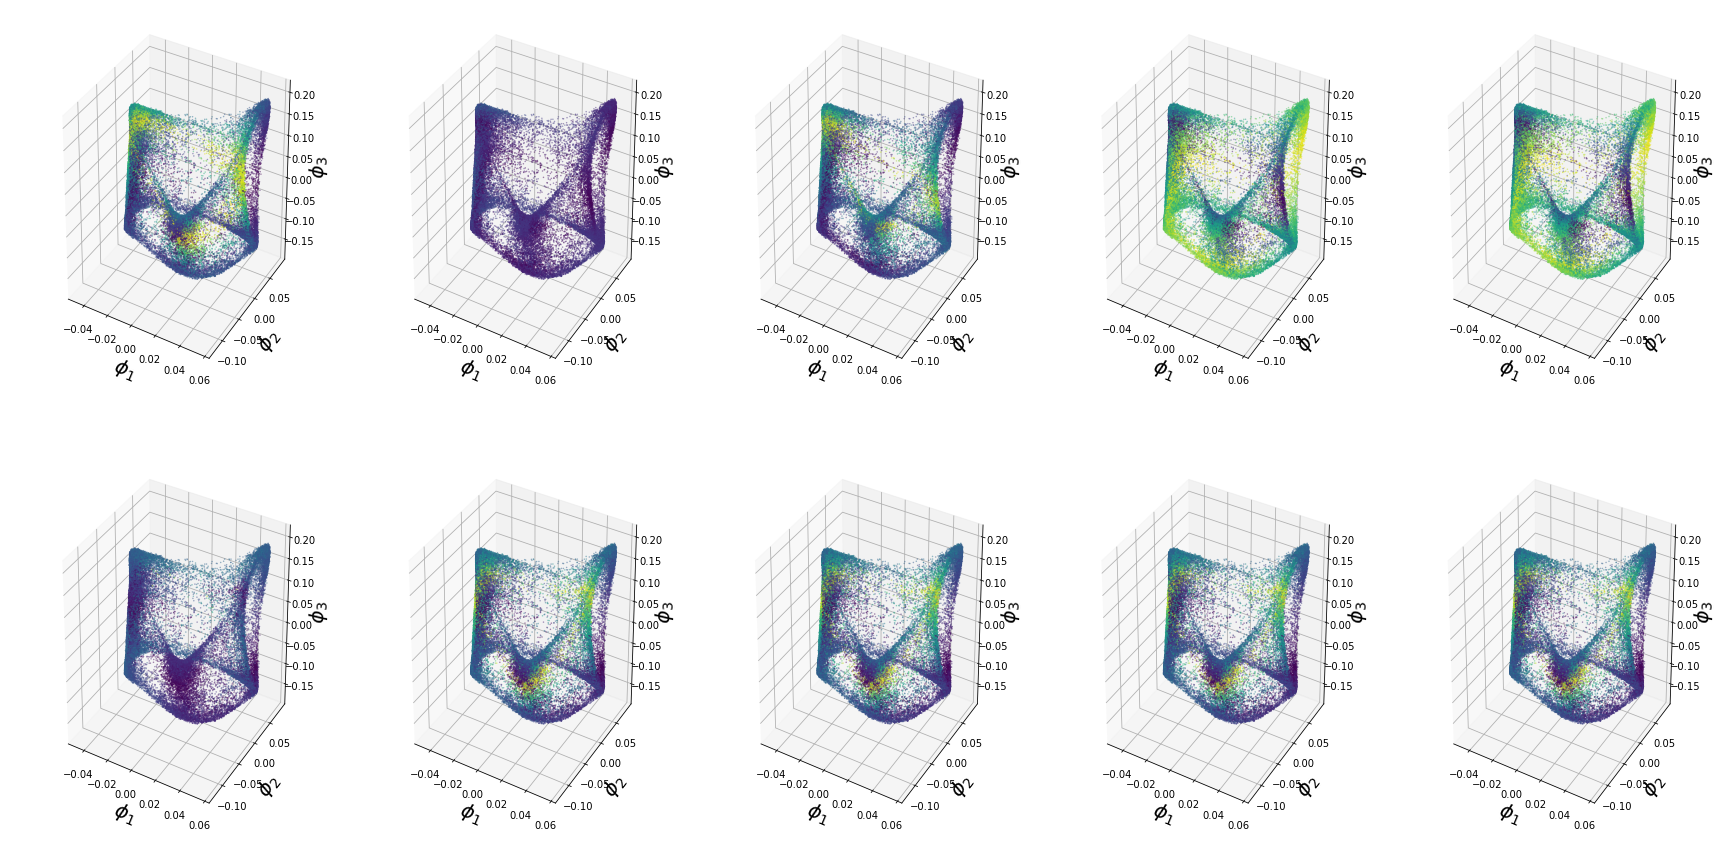

In [32]:
%matplotlib inline
data = experiment.N.data
axes = [0,1,2]
s = 100
alpha = .5

fig, axs = plt.subplots(2,5, figsize = (30,15))

for r in range(5):
    for o in range(2):
        axs[o,r].set_axis_off()
data = experiment.N.data
axes = [0,1,2]
s = 1
alpha = .5
selected_points = list(range(50000))
x = data[:, 0][selected_points]
y = data[:, 1][selected_points]
z = data[:, 2][selected_points]
for r in range(5):
    for o in range(2):
        ax = fig.add_subplot(2,5, o*5 + r + 1, projection='3d')
        #fig = plt.figure(figsize=(15,10))
        #ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.scatter(x, y, z, c = g_brute[r,o], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
        ax.set_xlabel(r'$\phi_1$', fontsize = 20)
        ax.set_ylabel(r'$\phi_2$', fontsize = 20)
        ax.set_zlabel(r'$\phi_3$', fontsize = 20)
        #ax.set_axis_off()

In [ ]:
g_brute[r,o]

In [18]:


with open('/Users/samsonkoelle/Downloads/malonaldehyde_010521_n100pallnrep5results.pkl' ,
         'rb') as loader:
     results_malall = pickle.load(loader)

with open('/Users/samsonkoelle/Downloads/malonaldehyde_010521_p12rep5n500_oldnormresults.pkl' ,
         'rb') as loader:
     results_mal12 = pickle.load(loader)
        
with open('/Users/samsonkoelle/Downloads/toluene_010521_pdiagram_rep5n500_oldnormresults.pkl' ,
         'rb') as loader:
     results_toluene = pickle.load(loader)